In [16]:
# Read crime records data
crime = pd.read_csv("London_crime_data.csv")
crime.head()

,MajorText,MinorText,LookUp_BoroughName,201812,201901,201902,201903,201904,201905,201906,...,202002,202003,202004,202005,202006,202007,202008,202009,202010,202011
0,Arson and Criminal Damage,Arson,Barking and Dagenham,1,5,2,5,5,11,3,...,5,6,2,2,4,4,6,2,7,4
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,88,97,127,138,130,140,113,...,103,107,80,86,121,122,114,116,119,100
2,Burglary,Burglary - Business and Community,Barking and Dagenham,33,45,24,29,27,21,27,...,17,28,29,16,16,28,24,32,21,19
3,Burglary,Burglary - Residential,Barking and Dagenham,164,114,107,99,96,114,96,...,123,97,57,42,63,72,63,54,67,90
4,Drug Offences,Drug Trafficking,Barking and Dagenham,4,6,2,6,5,9,6,...,6,6,15,13,12,21,9,11,14,17


In [17]:
# Create a column for sum of incidents in 24 months
crime['Sum'] = crime.iloc[:,3:27].sum(axis=1)
crimesum = crime['Sum']
crime.drop(labels=['Sum'], axis=1,inplace = True)
crime.insert(3, 'Sum', crimesum)
crime.head()

,MajorText,MinorText,LookUp_BoroughName,Sum,201812,201901,201902,201903,201904,201905,...,202002,202003,202004,202005,202006,202007,202008,202009,202010,202011
0,Arson and Criminal Damage,Arson,Barking and Dagenham,115,1,5,2,5,5,11,...,5,6,2,2,4,4,6,2,7,4
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,2687,88,97,127,138,130,140,...,103,107,80,86,121,122,114,116,119,100
2,Burglary,Burglary - Business and Community,Barking and Dagenham,656,33,45,24,29,27,21,...,17,28,29,16,16,28,24,32,21,19
3,Burglary,Burglary - Residential,Barking and Dagenham,2193,164,114,107,99,96,114,...,123,97,57,42,63,72,63,54,67,90
4,Drug Offences,Drug Trafficking,Barking and Dagenham,228,4,6,2,6,5,9,...,6,6,15,13,12,21,9,11,14,17


In [18]:
# Delete unnecessary columns
crime.drop(crime.columns[0:2], axis=1, inplace=True)
crime.drop(crime.columns[2:26], axis=1, inplace=True)

In [19]:
# Rename column to human friendly name
crime.rename(columns={'LookUp_BoroughName' : 'Borough'},inplace=True)

In [20]:
crime.head()

,Borough,Sum
0,Barking and Dagenham,115
1,Barking and Dagenham,2687
2,Barking and Dagenham,656
3,Barking and Dagenham,2193
4,Barking and Dagenham,228


In [21]:
# Calculate sum of incidents in the last 24 months by boroughs
crime = crime.groupby(['Borough'], as_index=False).sum()
crime.rename(columns={'Sum' : 'CrimesTotal'},inplace=True)
crime.head()

,Borough,CrimesTotal
0,Barking and Dagenham,39456
1,Barnet,59167
2,Bexley,33929
3,Brent,59257
4,Bromley,47499


### Methodology

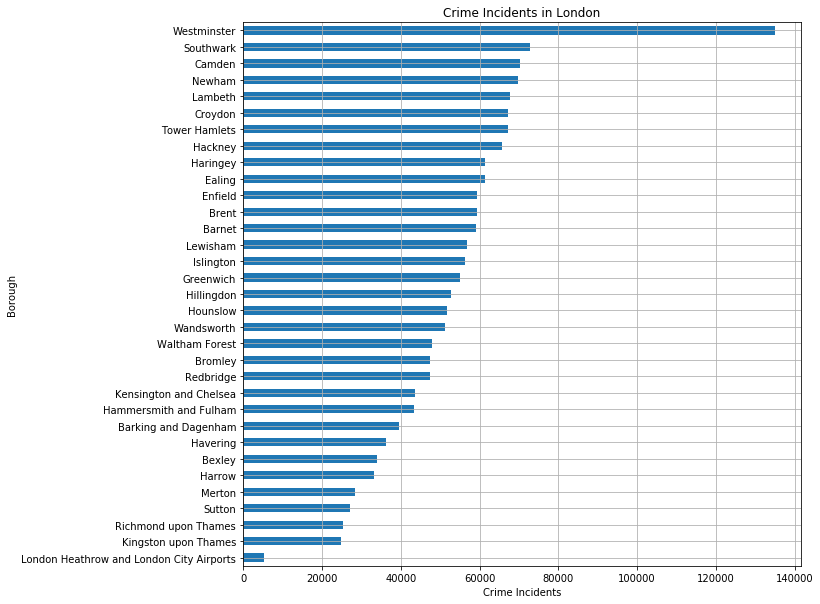

In [24]:
#Visualize crime data
crime.set_index('Borough')['CrimesTotal'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.xlabel('Crime Incidents')
plt.title('Crime Incidents in London')
plt.show()

In [25]:
#Combine crime data and borough information data
df = pd.merge(crime,info, how='outer', on='Borough')
df.head()

,Borough,CrimesTotal,Population,Latitude,Longitude
0,Barking and Dagenham,39456,212906,51.5607,0.1557
1,Barnet,59167,395896,51.6252,-0.1517
2,Bexley,33929,248287,51.4549,0.1505
3,Brent,59257,329771,51.5588,-0.2817
4,Bromley,47499,332336,51.4039,0.0198


In [26]:
#Check data type
df.dtypes

Borough        object
CrimesTotal     int64
Population     object
Latitude       object
Longitude      object
dtype: object

In [27]:
df['Population'] = pd.to_numeric(df['Population'])

In [35]:
df.dtypes

Borough                   object
CrimesTotal                int64
Population               float64
Latitude                  object
Longitude                 object
Crimes_per_population    float64
C                        float64
dtype: object

In [29]:
#df.to_csv('df.csv')

In [84]:
# Change the sum into monthly average
crime['CrimesAVG'] = crime['CrimesTotal']/24
crime.head()

,Borough,CrimesTotal,CrimesAVG
0,Barking and Dagenham,39456,1644.000000
1,Barnet,59167,2465.291667
2,Bexley,33929,1413.708333
3,Brent,59257,2469.041667
4,Bromley,47499,1979.125000


In [36]:
#Create a column that shows the number of crimes per 1000 people per month
df['Population'].astype(float)
df['CrimesTotal'].astype(float)
df['Crimes_per_population'] = df['CrimesTotal'] / df['Population']
df.head()

,Borough,CrimesTotal,Population,Latitude,Longitude,Crimes_per_population,C
0,Barking and Dagenham,39456,212906.0,51.5607,0.1557,0.185321,0.185321
1,Barnet,59167,395896.0,51.6252,-0.1517,0.149451,0.149451
2,Bexley,33929,248287.0,51.4549,0.1505,0.136652,0.136652
3,Brent,59257,329771.0,51.5588,-0.2817,0.179691,0.179691
4,Bromley,47499,332336.0,51.4039,0.0198,0.142925,0.142925


In [37]:
#Visualize crime data
crime.set_index('Borough')['Crimes_per_population'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.xlabel('Crime Incidents')
plt.title('Crime Incidents in London')
plt.show()

KeyError: 'Crimes_per_population'